In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [447]:
df = pd.read_csv("ages_dataset.csv")
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Coordinates (Lat/Lon),Associated Country Life Expectancy
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0,"['United Kingdom', 'United States']","[(55.378051, -3.435973), (37.09024, -95.712891)]","[81.3, 78.5]"
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],"[(55.378051, -3.435973)]",[81.3]
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0,['United States'],"[(37.09024, -95.712891)]",[78.5]
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0,['Austria'],"[(47.516231, 14.550072)]",[81.6]
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0,"['Austria', 'Italy']","[(47.516231, 14.550072), (41.87194, 12.56738)]","[81.6, 82.9]"


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 13 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   Id                                        1223009 non-null  object 
 1   Name                                      1223009 non-null  object 
 2   Short description                         1155109 non-null  object 
 3   Gender                                    1089363 non-null  object 
 4   Country                                   887500 non-null   object 
 5   Occupation                                1016095 non-null  object 
 6   Birth year                                1223009 non-null  int64  
 7   Death year                                1223008 non-null  float64
 8   Manner of death                           53603 non-null    object 
 9   Age of death                              1223008 non-null  float64
 10  Associ

In [449]:
# Extracts information for a numerical column
def describe_numerical_column(column_name):
    column_data = df[column_name]
    
    non_null_count = column_data.count()
    unique_count = column_data.nunique()
    min_value = column_data.min()
    max_value = column_data.max()
    mean_value = column_data.mean()
    median_value = column_data.median()
    mode_value = column_data.mode()[0]  # Takes the first mode in case there are multiple
    missing_values_count = len(df) - non_null_count
    missing_values_percent = (missing_values_count / len(df)) * 100
    five_num_summary = column_data.describe()[['25%', '50%', '75%']]
    
    return {
        'Non-Null Count': non_null_count,
        'Unique Count': unique_count,
        'Min Value': min_value,
        'Max Value': max_value,
        'Mean Value': mean_value,
        'Median Value': median_value,
        'Mode Value': mode_value,
        'Missing Values Count': missing_values_count,
        'Missing Values Percentage': missing_values_percent,
        'Five-Number Summary': five_num_summary
    }

# Extracts information for a categorical column
def describe_categorical_column(column_name):
    column_data = df[column_name]
    non_null_count = column_data.count()
    unique_count = column_data.nunique()
    most_common_value = column_data.mode()[0] if not column_data.mode().empty else "N/A"  # Takes the first mode in case there are multiple
    missing_values_count = len(df) - non_null_count
    missing_values_percent = (missing_values_count / len(df)) * 100
    
    return {
        'Non-Null Count': non_null_count,
        'Unique Count': unique_count,
        'Most Common Value': most_common_value,
        'Missing Values Count': missing_values_count,
        'Missing Values Percentage': missing_values_percent
    }


* 1,223,009 data entries
* 13 columns/attributes
* Null value counts can be derived from the information above.
* "Manner of death" contains the least values

In [450]:
#Print number of unique values of each column
print("\nSize of each variation of categories:")
for column in df:
    print(column + ":", df[column].unique().size)


Size of each variation of categories:
Id: 1222997
Name: 1130871
Short description: 512440
Gender: 21
Country: 5962
Occupation: 9314
Birth year: 2173
Death year: 2254
Manner of death: 207
Age of death: 131
Associated Countries: 1900
Associated Country Coordinates (Lat/Lon): 1900
Associated Country Life Expectancy: 1619


## Data Exploration

### ID

The 'ID' attribute serves as a nominal identifier for each entry in the dataset. It consists of 1,233,009 entries, of which 1,222,997 are unique. Each ID starts with the letter 'Q' followed by a numerical identifier. The range of these numerical identifiers spans from 42 to 77,254,864. There are no missing values for this attribute, making it a reliable column for identification purposes.


In [451]:
#check if all id entries start with 'Q'
df['Id'].str.startswith('Q').all()
# Remove the 'Q' and convert the remaining part to integers
idDf = df.copy()
idDf['Id'] = df['Id'].str.lstrip('Q').astype(int)
# Calculate the range of the integer numbers in the 'Id' column
id_range = idDf['Id'].min(), idDf['Id'].max()
print(id_range)
id_info = describe_categorical_column("Id")
id_info


(23, 77254864)


{'Non-Null Count': 1223009,
 'Unique Count': 1222997,
 'Most Common Value': 'Q19974327',
 'Missing Values Count': 0,
 'Missing Values Percentage': 0.0}

### Name
 
The 'Name' attribute is a nominal variable that categorizes entries by the name of the person. The dataset contains 1,233,009 names, out of which 1,130,871 are unique. Names typically appear as full names and may occasionally include titles or initials. The dataset features names in multiple languages and incorporates a total of 2,927 unique characters. 'John Smith' is the most frequent name, appearing 44 times. There are no missing values for this attribute.


In [452]:
name_info = describe_categorical_column("Name")
# find shortest and longest string in name column
shortest = df['Name'].str.len().min()
longest = df['Name'].str.len().max()
print("Shortest name length: ", shortest)
print("Longest name length: ", longest)
# find all names that are all numbers
print("Names that are all numbers: ", df['Name'][df['Name'].str.isnumeric() == True].iloc[0])
# remove all names that are all numbers
df = df[df['Name'].str.isnumeric() == False]
# find how many different character sets are in the names
print("Number of different character sets: ", df['Name'].str.lower().str.split('').explode().unique().shape[0])
# print different character sets
print("Different character sets: ", df['Name'].str.lower().str.split('').explode().unique())
# print shortest and longest name
print("Shortest name: ", df['Name'][df['Name'].str.len() == shortest].iloc[0])
print("Longest name: ", df['Name'][df['Name'].str.len() == longest].iloc[0])
name_info

Shortest name length:  2
Longest name length:  115
Names that are all numbers:  66
Number of different character sets:  3305
Different character sets:  ['' 'g' 'e' ... 'ग' 'ध' 'ी']
Shortest name:  蕭撝
Longest name:  Jacques I d Harcourt, seigneur de Montgommery, de Mesle-sur-Sarre, d'Aubigny, de Noyelles, de Vignes et de Mézières


{'Non-Null Count': 1223009,
 'Unique Count': 1130871,
 'Most Common Value': 'John Smith',
 'Missing Values Count': 0,
 'Missing Values Percentage': 0.0}

### Manner of Death

The 'Manner of Death' attribute is a categorical variable that describes how individuals in the dataset died. This column contains 53,603 non-null entries, spread across 206 unique categories. The most commonly reported manner of death is "natural causes.". The majority of this attribute is missing; specifically, 1,169,406 entries constituting approximately 95.6% of the dataset. Given the very high percentage of missing values, this column will require careful consideration during processing.

In [453]:
manner_of_death_info = describe_categorical_column('Manner of death')
manner_of_death_info

{'Non-Null Count': 53603,
 'Unique Count': 206,
 'Most Common Value': 'natural causes',
 'Missing Values Count': 1169405,
 'Missing Values Percentage': 95.6171177948141}

### Gender

The 'Gender' attribute is a categorical variable indicating the gender identity of individuals in the dataset. There are a total of 1,089,363 non-null entries, featuring 2 unique categories. These categories range from more commonly recognized terms like 'Male' and 'Female' to more specific categories such as 'Transgender Female', 'Non-Binary', and 'Eunuch'. Some entries even have multiple gender identities listed, separated by semicolons. Missing values are present, amounting to approximately 11% of the total dataset.

In [454]:
gender_info = describe_categorical_column('Gender')
gender_info

{'Non-Null Count': 1089362,
 'Unique Count': 20,
 'Most Common Value': 'Male',
 'Missing Values Count': 133646,
 'Missing Values Percentage': 10.927647243517622}

### Country

The 'Country' attribute is a list of strings that represents the countries which individuals in the dataset were associated, using the names of the countries as they were known at the time. The column contains 887,499 non-null entries, with 5,961 unique country names. The most frequently occurring country in this column is the United States of America. Notably, there are 335,509 missing entries, which make up approximately 27.43% of the dataset. Given the sizable percentage of missing values, special attention may be needed during the data preprocessing or analysis stage.

In [455]:
country_info = describe_categorical_column('Country')
country_info

{'Non-Null Count': 887499,
 'Unique Count': 5961,
 'Most Common Value': 'United States of America',
 'Missing Values Count': 335509,
 'Missing Values Percentage': 27.43309937465658}

### Occupation

The 'Occupation' attribute is a categorical variable indicating the profession or role of individuals in the dataset. The dataset contains 1,016,095 non-null entries, spread across 9,314 unique categories. Occupations range from specific job titles like "Software Engineer" to more general classifications like "Artist" which is the most common label. Importantly, some entries contain multiple occupations separated by inconsistent delimiters such as ';', ',', and ':'. To standardize this, all delimiters will be converted to semicolons (';'), and the entries transformed into lists. Missing values make up around .16.9% of the total entries for this column.

In [456]:
occupation_info = describe_categorical_column('Occupation')
occupation_info

{'Non-Null Count': 1016094,
 'Unique Count': 9313,
 'Most Common Value': 'Artist',
 'Missing Values Count': 206914,
 'Missing Values Percentage': 16.918450247259216}

### Birth Year

The 'Birth year' attribute is an float variable indicating the birth year of individuals in the dataset. The dataset contains 1,223,009 non-null entries, with 2,173 unique birth years. The range of birth years spans from -2700 to 2016. The mean birth year is approximately 1844.97, with a median value of 1887. The most common birth year is 1920. There are no missing values for this attribute. The five-number summary reveals that the 25th percentile is at 1828, the median (or 50th percentile) is at 1887, and the 75th percentile is at 1918.

In [457]:
birth_year_info = describe_numerical_column('Birth year')
birth_year_info

{'Non-Null Count': 1223008,
 'Unique Count': 2173,
 'Min Value': -2700,
 'Max Value': 2016,
 'Mean Value': 1844.9716633088256,
 'Median Value': 1887.0,
 'Mode Value': 1920,
 'Missing Values Count': 0,
 'Missing Values Percentage': 0.0,
 'Five-Number Summary': 25%    1828.0
 50%    1887.0
 75%    1918.0
 Name: Birth year, dtype: float64}

### Death Year

The 'Death Year' attribute is a float variable that specifies the year of death for individuals in the dataset. The dataset comprises 1,223,008 non-null entries, covering 2,253 unique death years. The years of death range from -2659 to 2021, with an average value of approximately 1914.25 and a median of 1955. The most frequent year of death is 2015. There is only one missing value, which constitutes a negligible percentage (approximately 0.0000818%) of the dataset. The five-number summary for this attribute shows that the 25th percentile is at 1895, the median is at 1955, and the 75th percentile is at 1994.

In [458]:
death_year_info = describe_numerical_column('Death year')
death_year_info

{'Non-Null Count': 1223007,
 'Unique Count': 2253,
 'Min Value': -2659.0,
 'Max Value': 2021.0,
 'Mean Value': 1914.2455832223363,
 'Median Value': 1955.0,
 'Mode Value': 2015.0,
 'Missing Values Count': 1,
 'Missing Values Percentage': 8.176561396164212e-05,
 'Five-Number Summary': 25%    1895.0
 50%    1955.0
 75%    1994.0
 Name: Death year, dtype: float64}

### Age of Death

The 'Age of Death' attribute is a float variable that records the age of death for individuals in the dataset. This column comprises 1,223,007 non-null entries, covering 130 unique ages. The ages range from 0 to 169 years, with a mean age of approximately 69.27 years and a median of 72 years. The most frequent age of death is 80 years. Only a single entry is missing in this column, constituting an almost negligible percentage (approximately 0.0000818%) of the dataset. The five-number summary for this attribute indicates that the 25th percentile is at 60 years, the median is at 72 years, and the 75th percentile is at 81 years.

In [459]:
age_of_death_info = describe_numerical_column('Age of death')
age_of_death_info

{'Non-Null Count': 1223007,
 'Unique Count': 130,
 'Min Value': 0.0,
 'Max Value': 169.0,
 'Mean Value': 69.27404013223146,
 'Median Value': 72.0,
 'Mode Value': 80.0,
 'Missing Values Count': 1,
 'Missing Values Percentage': 8.176561396164212e-05,
 'Five-Number Summary': 25%    60.0
 50%    72.0
 75%    81.0
 Name: Age of death, dtype: float64}

### Associated Countries

The 'Associated Countries' attribute is a string variable that appears to represent lists of modern day countries with which individuals in the dataset are associated (many of the countries no longer exist for earlier entries). However, it's crucial to note that this column is not immediately usable for analysis in its original form as it is not a list but a string. The dataset contains inconsistent delimiters like ', ' and ': ' that separate the countries within each "list." Additionally, entries include brackets and single quotes.

To standardize and clean this data for analysis, several preprocessing steps are performed:

All occurrences of ', ' and ': ' are replaced with a semicolon and space ('; ') as a standardized delimiter.
Brackets and single quotes are removed to simplify the strings.
After these preprocessing steps, the attribute can be split by '; ' to create a usable list of associated countries for each entry.

After preprocessing, the column now contains 1,899 unique countries. The most commonly associated country in the dataset is the United States, appearing 153,241 times.

This column requires further normalisation, as there are multiple country names for each country - 'United States', 'USA', The United States', for example.

In [460]:
associated_countries_info = describe_categorical_column('Associated Countries')
associated_countries_info

{'Non-Null Count': 854316,
 'Unique Count': 1899,
 'Most Common Value': "['United States']",
 'Missing Values Count': 368692,
 'Missing Values Percentage': 30.146327742745754}

### Associated Country Coordinates (Lat/Lon)

The 'Associated Country Coordinates (Lat/Lon)' attribute is a list of tuples, where each tuple contains the latitude and longitude coordinates corresponding to the associated countries of individuals in the dataset. This column has 854,316 non-null entries, with 1,899 unique coordinate pairs. The most commonly occurring coordinate pair is for the United States, represented as [(37.09024, -95.712891)], which is presumably the centroid of the country. A significant portion of the data — 368,692 entries or approximately 30.15% is missing.

In [461]:
associated_countries_geo_info = describe_categorical_column('Associated Country Coordinates (Lat/Lon)')
associated_countries_geo_info

{'Non-Null Count': 854316,
 'Unique Count': 1899,
 'Most Common Value': '[(37.09024, -95.712891)]',
 'Missing Values Count': 368692,
 'Missing Values Percentage': 30.146327742745754}

### Associated Country Life Expectancy

The 'Associated Country Life Expectancy' attribute is a list of float values that correspond to the life expectancy in the associated countries of an individual in the dataset. This column consists of 854,079 non-null entries and features 1,618 unique life expectancy values. The most frequently occurring life expectancy value is 78.5 years. It's important to note that there are 368,929 missing entries, making up approximately 30.17% of the dataset.

In [462]:
associated_countries_lifeEx_info = describe_categorical_column('Associated Country Life Expectancy')
associated_countries_lifeEx_info

{'Non-Null Count': 854079,
 'Unique Count': 1618,
 'Most Common Value': '[78.5]',
 'Missing Values Count': 368929,
 'Missing Values Percentage': 30.165706193254664}

## Preprocessing

### Remove unusable data
**Short description** - short descriptions do not have a standardised format, and are largely missing as most data entries are not of famous individuals.<br>
**Country** - country contains the same information as Associated Countries except with the name at the time of the persons association with it. Modern day names of the countries are of greater interest.<br>
**Associated Country Coordinates** - Geographical data about locations are not of interest.


Data entries with birth dates prior to the 1800 are to be discarded as reliable record keeping practices were not in place. Bias to the recording of successful, famous or wealthy individuals lives introduces an unacceptable amount of noise to the data. The lives of the exceptional do not represent the general population.

In [463]:
# Drop columns that are not needed
df.drop(['Short description', 'Country', 'Associated Country Coordinates (Lat/Lon)'], axis=1, inplace=True)
# Drop entries which have a Birth year prior to 1800
df = df[df['Birth year'] > 1800]

226,660 entries removed due to the date cutoff

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996348 entries, 1 to 1223008
Data columns (total 10 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Id                                  996348 non-null  object 
 1   Name                                996348 non-null  object 
 2   Gender                              884247 non-null  object 
 3   Occupation                          851097 non-null  object 
 4   Birth year                          996348 non-null  int64  
 5   Death year                          996347 non-null  float64
 6   Manner of death                     48864 non-null   object 
 7   Age of death                        996347 non-null  float64
 8   Associated Countries                742643 non-null  object 
 9   Associated Country Life Expectancy  742415 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 83.6+ MB


### Normalise Formats

In [465]:
print(df.dtypes)
df.head(1)

Id                                     object
Name                                   object
Gender                                 object
Occupation                             object
Birth year                              int64
Death year                            float64
Manner of death                        object
Age of death                          float64
Associated Countries                   object
Associated Country Life Expectancy     object
dtype: object


,Id,Name,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy
1,Q42,Douglas Adams,Male,Artist,1952,2001.0,natural causes,49.0,['United Kingdom'],[81.3]


In [466]:
#fill empty values with 0 to convert data type
df["Death year"] = df["Death year"].fillna(0)
df["Age of death"] = df["Age of death"].fillna(0)
#convert numerical values to int32
df["Death year"] = df["Death year"].astype('int32')
df["Birth year"] = df["Birth year"].astype('int32')
df["Age of death"] = df["Age of death"].astype('int32')
#Convert string categorical data to all lowercase
df["Name"] = df["Name"].str.lower()
df["Gender"] = df["Gender"].str.lower()
df["Associated Countries"] = df["Associated Countries"].str.lower()
df["Occupation"] = df["Occupation"].str.lower()
df["Manner of death"] = df["Manner of death"].str.lower()
print(df.dtypes)
df.head(1)

Id                                    object
Name                                  object
Gender                                object
Occupation                            object
Birth year                             int32
Death year                             int32
Manner of death                       object
Age of death                           int32
Associated Countries                  object
Associated Country Life Expectancy    object
dtype: object


,Id,Name,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy
1,Q42,douglas adams,male,artist,1952,2001,natural causes,49,['united kingdom'],[81.3]


#### Remove duplicates

In [467]:
print("Dataframe duplicates: ", df.duplicated().sum())

for column in df:
    print(column, "duplicates: ", df[column].duplicated().sum())

Dataframe duplicates:  9
Id duplicates:  11
Name duplicates:  63190
Gender duplicates:  996328
Occupation duplicates:  988660
Birth year duplicates:  996134
Death year duplicates:  996129
Manner of death duplicates:  996169
Age of death duplicates:  996221
Associated Countries duplicates:  994550
Associated Country Life Expectancy duplicates:  994814


As seen below, there is an issue with duplicates - there are duplicates of famous figures, which we can be (somewhat) certain are the same entry. However we can not remove all entries with duplicated names because many names are common. Removing entries with the same name, birth year, and death year is one solution.

In [468]:
# Find duplicate names
duplicate_names = df[df.duplicated(subset=['Name'], keep=False)]
duplicate_names_list = duplicate_names['Name'].unique().tolist()
print(duplicate_names_list)

# List of duplicate names with a count of how many times they appear
duplicate_names_count = duplicate_names['Name'].value_counts()
print(duplicate_names_count)


['douglas adams', 'victor hugo', 'giuseppe garibaldi', 'jean moulin', 'roald amundsen', 'charles darwin', 'josé joaquín pérez', 'richard wagner', 'neil armstrong', 'barbara', 'giuseppe farina', 'charles de gaulle', 'hans schmidt', 'willy brandt', 'helmut schmidt', 'helmut kohl', 'george harrison', 'friedrich ebert', 'michael jackson', 'graham hill', 'jim clark', 'john surtees', 'david cairns', 'john gregg', 'james coburn', 'paul otto', 'manfred von richthofen', 'marcus ravenswaaij', 'birger kildal', 'luigi bailo', 'james brown', 'james joyce', 'antonín dvořák', 'otto frank', 'alfred hitchcock', 'frank herbert', 'winston churchill', 'andrew johnson', 'henry ford', 'max planck', 'karl marx', 'max weber', 'graham taylor', 'richard nixon', 'alice greene', 'neville chamberlain', 'karl renner', 'otto bauer', 'michael mayr', 'antoni grabowski', 'ángel ramos', 'jules dubois', 'pedro beltrán', 'robert cecil', 'helmar frank', 'georges lagrange', 'heinrich schmid', 'alfred marshall', 'richard str

In [469]:
# Drop duplicate entries based on 'Name', 'Birth year', and 'Death year', keeping only the first occurrence
df.drop_duplicates(subset=['Name', 'Birth year', 'Death year'], keep='first', inplace=True)


In [470]:
# Drop duplicate entries based on 'Name', 'Birth year', and 'Death year', keeping only the first occurrence
df.drop_duplicates(subset=['Name', 'Birth year', 'Death year'], keep='first', inplace=True)
# Drop duplicate entries based on 'Id'
df.drop_duplicates(subset=["Id"], inplace=True)
print("Dataframe duplicates: ", df.duplicated().sum())

for column in df:
    print(column, "duplicates: ", df[column].duplicated().sum())

# Find duplicate names
duplicate_names = df[df.duplicated(subset=['Name'], keep=False)]
duplicate_names_list = duplicate_names['Name'].unique().tolist()
print(duplicate_names_list)

Dataframe duplicates:  0
Id duplicates:  0
Name duplicates:  62879
Gender duplicates:  996017
Occupation duplicates:  988350
Birth year duplicates:  995823
Death year duplicates:  995818
Manner of death duplicates:  995858
Age of death duplicates:  995910
Associated Countries duplicates:  994239
Associated Country Life Expectancy duplicates:  994503
['douglas adams', 'victor hugo', 'giuseppe garibaldi', 'jean moulin', 'roald amundsen', 'charles darwin', 'josé joaquín pérez', 'richard wagner', 'neil armstrong', 'barbara', 'giuseppe farina', 'charles de gaulle', 'hans schmidt', 'willy brandt', 'helmut schmidt', 'helmut kohl', 'george harrison', 'friedrich ebert', 'michael jackson', 'graham hill', 'jim clark', 'john surtees', 'david cairns', 'john gregg', 'james coburn', 'paul otto', 'manfred von richthofen', 'marcus ravenswaaij', 'birger kildal', 'luigi bailo', 'james brown', 'james joyce', 'antonín dvořák', 'otto frank', 'alfred hitchcock', 'frank herbert', 'winston churchill', 'andrew 

In [472]:
# Check data entries are not the same
charles_darwin_entries = df[df['Name'] == 'charles darwin']
print(douglas_adams_entries)
print(charles_darwin_entries)

               Id           Name Gender Occupation  Birth year  Death year  \
1             Q42  douglas adams   male     artist        1952        2001   
958845  Q21454969  douglas adams   male     artist        1853        1920   

       Manner of death  Age of death Associated Countries  \
1       natural causes            49   ['united kingdom']   
958845             NaN            67   ['united kingdom']   

       Associated Country Life Expectancy  
1                                  [81.3]  
958845                             [81.3]  
              Id            Name Gender          Occupation  Birth year  \
91         Q1035  charles darwin   male          researcher        1809   
432455  Q5076728  charles darwin   male  military personnel        1894   

        Death year Manner of death  Age of death Associated Countries  \
91            1882             NaN            73   ['united kingdom']   
432455        1941             NaN            47   ['united kingdom']   

   

### Formatting String Types

The Gender and Occupation columns are categorical but entries with multiple listed categories are represented as a string with a ';', ',', or ';' seperator and a concatenated string. eg "eunich; male" or "transgender male; female", "dock worker: labourer". To remedy this the seperators will be standardised to ';' and the entries converted to lists. This way each category can be used individually. 

Additionally the Associated Countries category is a string which looks like a list, therefore it's brackets and quotes must be removed.

In [473]:
# Standardise seperators
df['Occupation'] = df['Occupation'].str.replace(', ', '; ')
df['Occupation'] = df['Occupation'].str.replace(': ', '; ')
df['Gender'] = df['Gender'].str.replace(', ', '; ')
df['Associated Countries'] = df['Associated Countries'].str.replace(', ', '; ')
df['Associated Countries'] = df['Associated Countries'].str.replace(': ', '; ')
df['Associated Countries'] = df['Associated Countries'].str.replace(r'[\[\]]', '', regex=True)
df['Associated Countries'] = df['Associated Countries'].str.replace('\'', '', regex=True)
print(df['Occupation'].head(15))
print(df['Associated Countries'].head(15))
df.head()


1           artist
2       politician
6           artist
7           artist
10          artist
12      politician
14    statesperson
16         athlete
17      politician
18          artist
19         athlete
20          artist
21          artist
22      researcher
23      politician
Name: Occupation, dtype: object
1                united kingdom
2                 united states
6                        france
7                        france
10                united states
12                        chile
14    austria; germany; hungary
16                  netherlands
17                        chile
18              belarus; russia
19     czech republic; slovakia
20                united states
21                      jamaica
22                united states
23                        chile
Name: Associated Countries, dtype: object


,Id,Name,Gender,Occupation,Birth year,Death year,Manner of death,Age of death,Associated Countries,Associated Country Life Expectancy
1,Q42,douglas adams,male,artist,1952,2001,natural causes,49,united kingdom,[81.3]
2,Q91,abraham lincoln,male,politician,1809,1865,homicide,56,united states,[78.5]
6,Q272,paul morand,male,artist,1888,1976,NaN,88,france,[82.5]
7,Q296,claude monet,male,artist,1840,1926,natural causes,86,france,[82.5]
10,Q303,elvis presley,male,artist,1935,1977,natural causes,42,united states,[78.5]


In [474]:
from collections import Counter

df_cleaned = df.dropna(subset=['Associated Countries'])
# Convert the cleaned string to lists of strings
df_country = df_cleaned.copy()
df_country['Associated Countries'] = df_country['Associated Countries'].str.split('; ')

# Flatten the list and count the occurrences of each country
flattened_countries = [country for sublist in df_country['Associated Countries'].dropna() for country in sublist]
country_counter = Counter(flattened_countries)

# Find the number of unique countries and the most common one
unique_countries_count = len(set(flattened_countries))
most_common_country, most_common_count = country_counter.most_common(1)[0]

unique_countries_count, most_common_country, most_common_count

(191, 'united states', 150223)

### Associated Countries (After Preprocessing)

The 'Associated Countries' attribute has been preprocessed to create a more usable data structure. Initially, it was a string representation that appeared list-like but required cleaning and transformation. It is worth noting that the preprocessing steps included standardizing delimiters and converting the strings into actual lists of countries for easier analysis.

## Visualisation

Text(0, 0.5, 'Number of People')

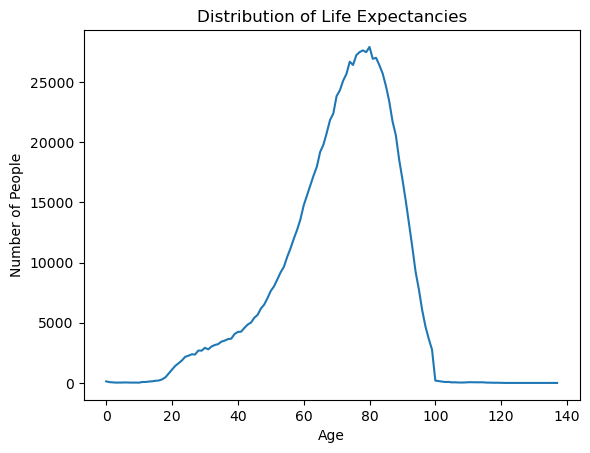

In [475]:
plt.title("Distribution of Life Expectancies")
plt.plot(df["Age of death"].value_counts().sort_index())
plt.xlabel("Age")
plt.ylabel("Number of People")

In [476]:
#display occupations
df['Occupation'].value_counts()

# Split the 'Occupation' column into lists
exploded_df = df.copy()
exploded_df['Occupation'] = exploded_df['Occupation'].str.split('; ')
exploded_df = exploded_df.explode('Occupation')


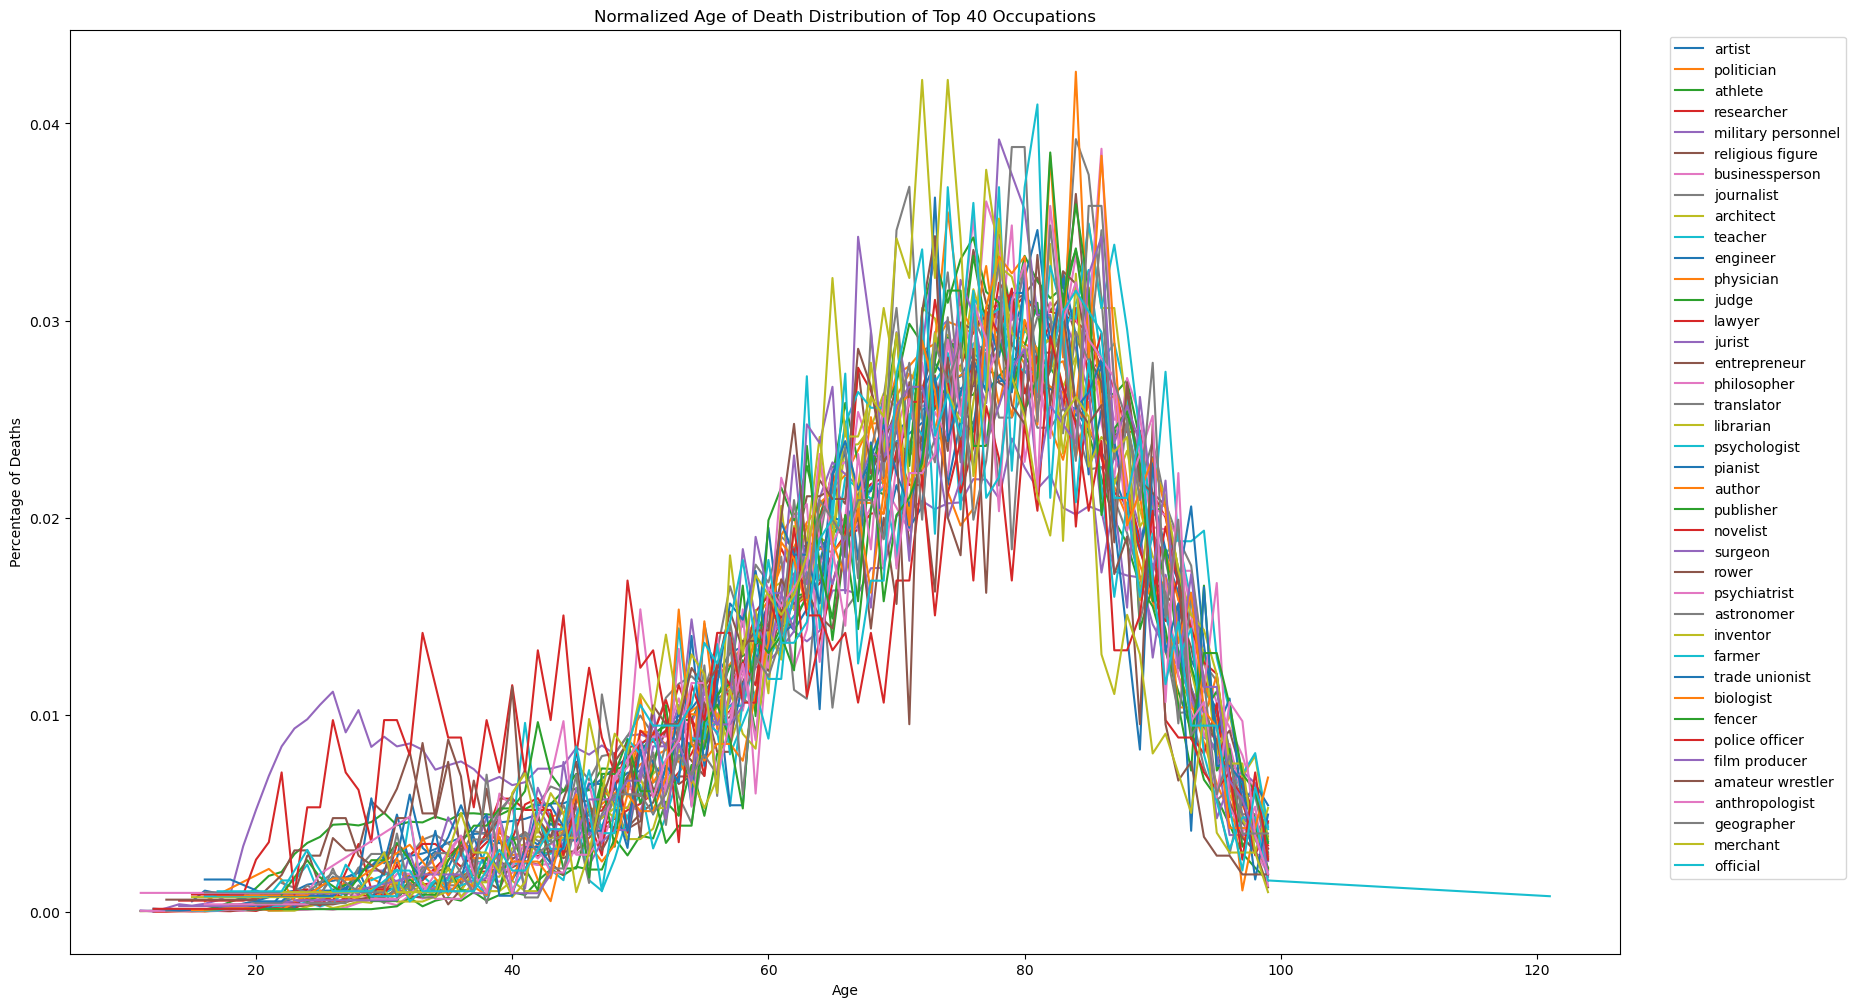

In [477]:
plt.figure(figsize=(20, 12))
plt.title("Normalized Age of Death Distribution of Top 40 Occupations")
top_40_occupations = exploded_df['Occupation'].value_counts().nlargest(40).index.tolist()

precomputed_data = {}
for occupation in top_40_occupations:
    age_counts = exploded_df[exploded_df["Occupation"] == occupation]["Age of death"].value_counts().sort_index()
    total_counts = age_counts.sum()
    precomputed_data[occupation] = age_counts / total_counts

for occupation in top_40_occupations:
    plt.plot(precomputed_data[occupation], label=occupation)

plt.xlabel("Age")
plt.ylabel("Percentage of Deaths")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

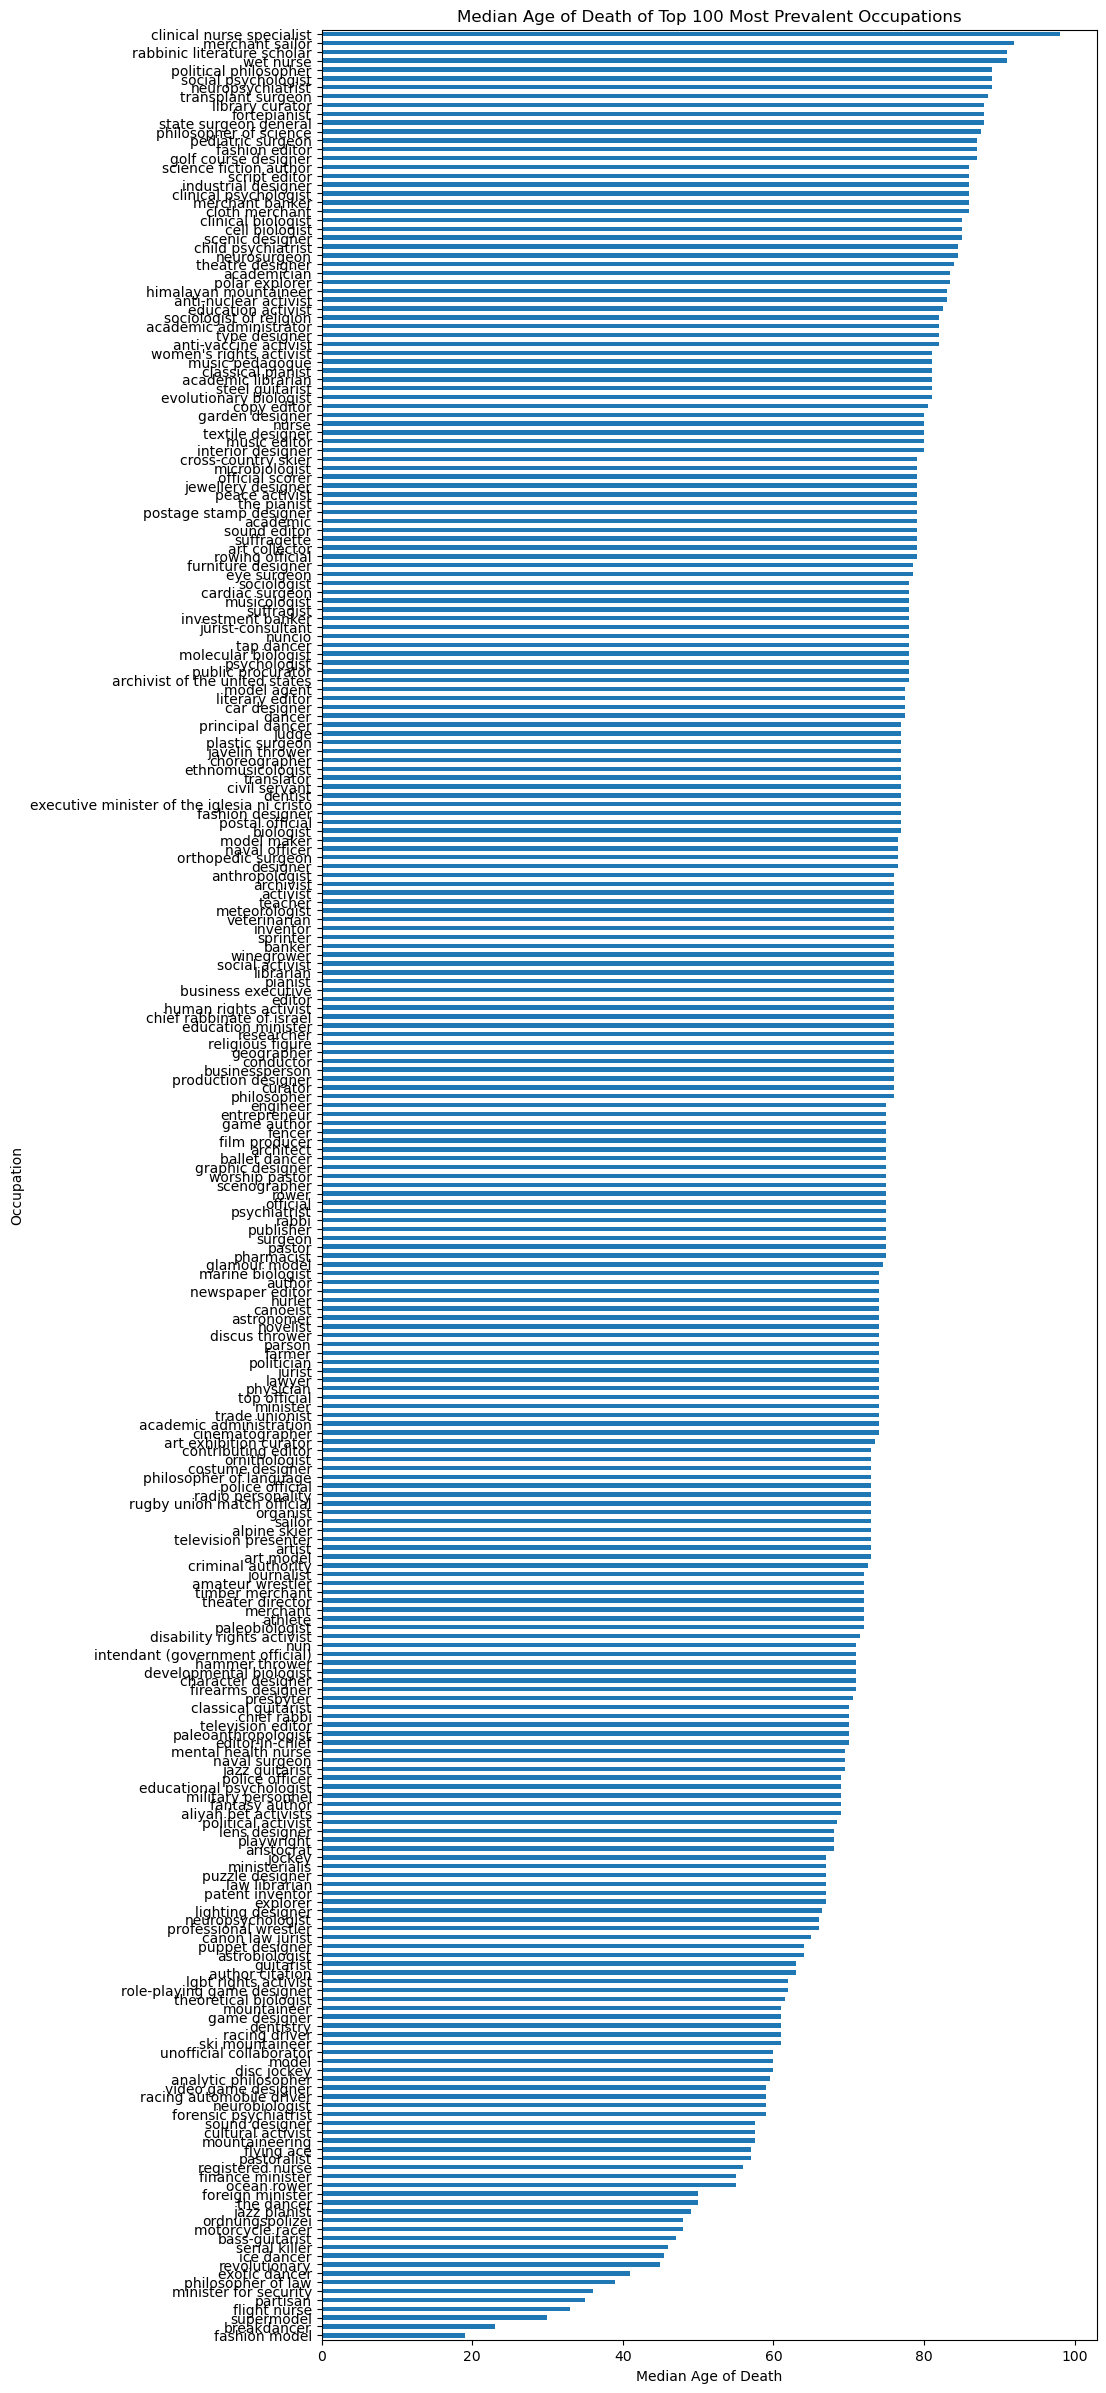

In [478]:
df_cleaned = exploded_df.dropna(subset=['Occupation'])

# Calculate the prevalence of each occupation
occupation_counts = df_cleaned['Occupation'].explode().value_counts()

# Get the top 100 most prevalent occupations
top_occupations = occupation_counts.nlargest(100).index

# Filter the DataFrame to include only the top 100 occupations
top_df = df_cleaned[df_cleaned['Occupation'].apply(lambda x: any(occupation in x for occupation in top_occupations))]

occupation_medians = top_df.groupby('Occupation')['Age of death'].median()

# Plotting
plt.figure(figsize=(10, 30))
occupation_medians.sort_values().plot(kind='barh')
plt.title("Median Age of Death of Top 100 Most Prevalent Occupations")
plt.xlabel("Median Age of Death")
plt.ylabel("Occupation")
plt.show()


We have too many occupations. if we want to get any useful/accurate insights we need a way to cluster them.

the occupation column puts people with multiple listed occupations together as a concatenated string with a ; splitting them. This will stop people who are listed with the same occupation being counted as such.

In [479]:
# print(exploded_df["Occupation"].unique())
# for titles in exploded_df["Occupation"].unique():
#     print(titles, "count: ", exploded_df[exploded_df["Occupation"] == titles].size)

In [480]:
df['Gender'].describe()


count     883964
unique        19
top         male
freq      790843
Name: Gender, dtype: object

### Median age of death by gender

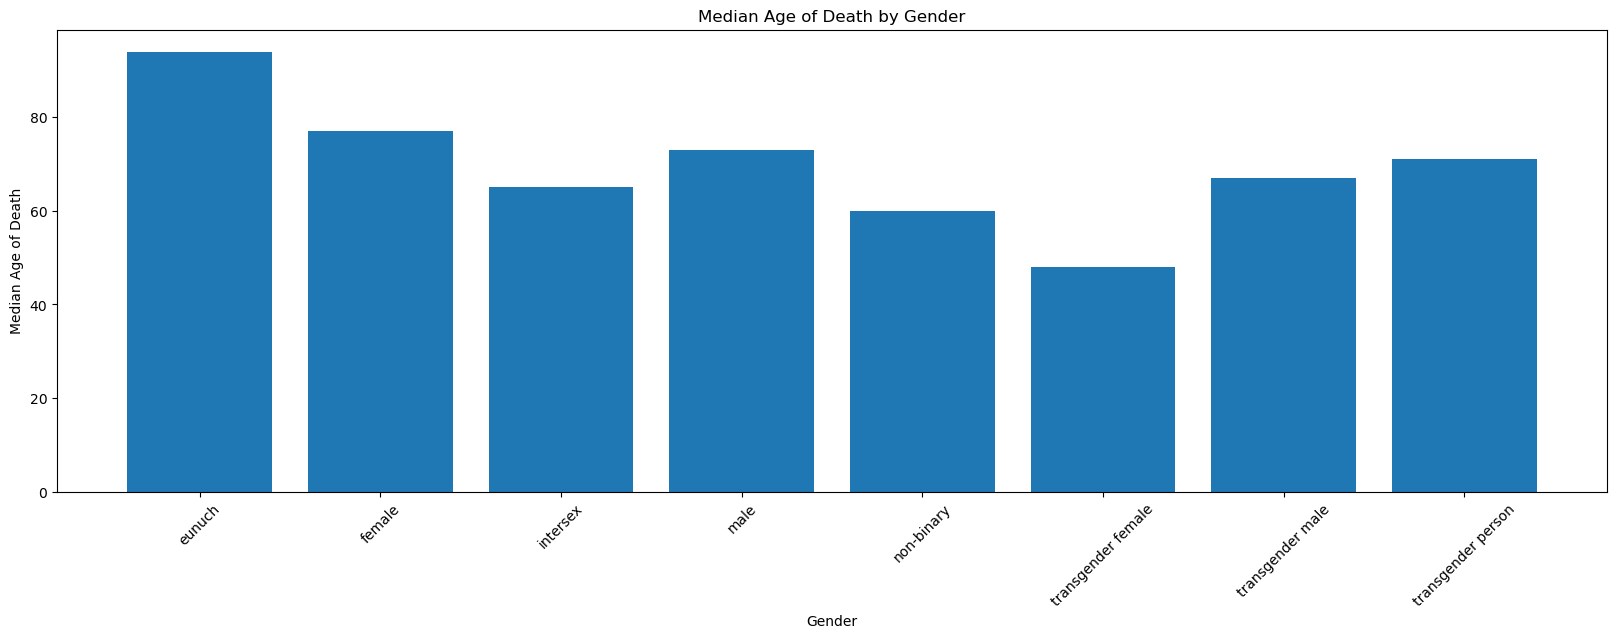

In [481]:
# Split the 'Gender' column into lists
df['Gender'] = df['Gender'].str.split('; ')

# Explode the DataFrame on the 'Gender' column
exploded_df = df.explode('Gender')
medians = exploded_df.groupby('Gender')['Age of death'].median().reset_index()

plt.figure(figsize=(20, 6))
plt.bar(medians['Gender'].astype(str), medians['Age of death'])
plt.xlabel('Gender')
plt.ylabel('Median Age of Death')
plt.title('Median Age of Death by Gender')
plt.xticks(rotation=45)
plt.show()


In [482]:
df['Gender'].unique()

TypeError: unhashable type: 'list'

C:\Users\Todd\AppData\Local\Temp\ipykernel_27328\3869997327.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Associated Countries'] = df_cleaned['Associated Countries'].apply(lambda x: x.split('; '))


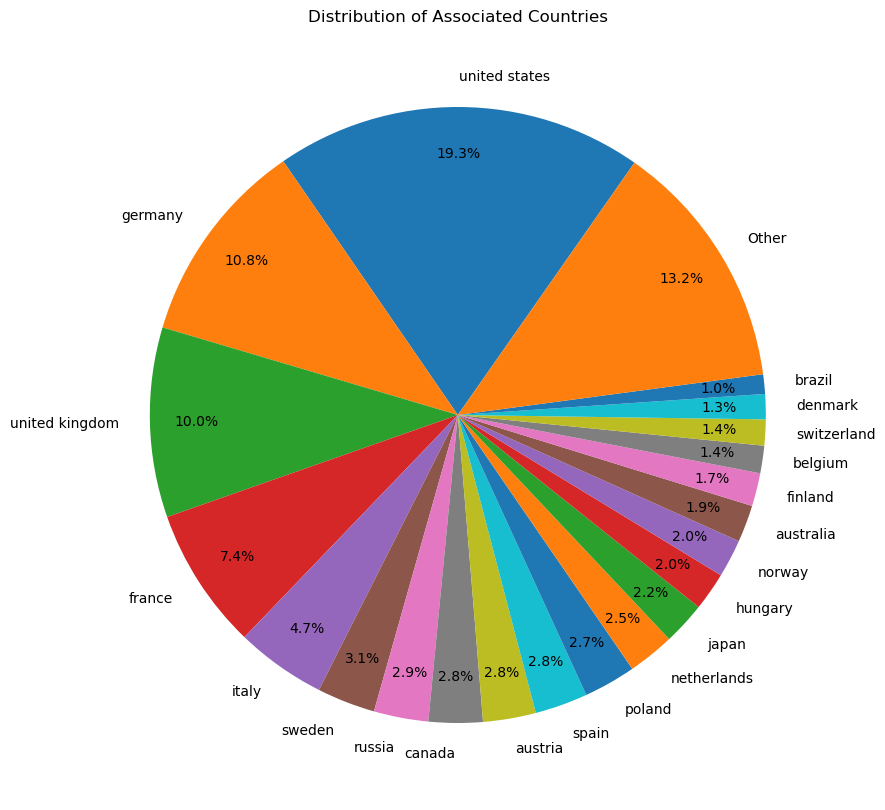

In [ ]:
df_cleaned = df.dropna(subset=['Associated Countries'])

# Split the 'Associated Countries' column into lists
df_cleaned['Associated Countries'] = df_cleaned['Associated Countries'].apply(lambda x: x.split('; '))
exploded_df = df_cleaned.explode('Associated Countries')
country_counts = exploded_df['Associated Countries'].value_counts()

# Set a threshold for categorizing less frequent countries as 'Other'
threshold = 0.01 * len(exploded_df)
other_countries = country_counts[country_counts < threshold]
other_sum = other_countries.sum()

# Combine less frequent countries into an 'Other' category
country_counts = country_counts[country_counts >= threshold]
country_counts['Other'] = other_sum

plt.figure(figsize=(10, 10))
pie = country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=55, label='', pctdistance=0.85)
plt.title("Distribution of Associated Countries")
plt.show()


C:\Users\Todd\AppData\Local\Temp\ipykernel_27328\3716141893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Associated Countries'] = df_cleaned['Associated Countries'].apply(lambda x: x.split('; '))


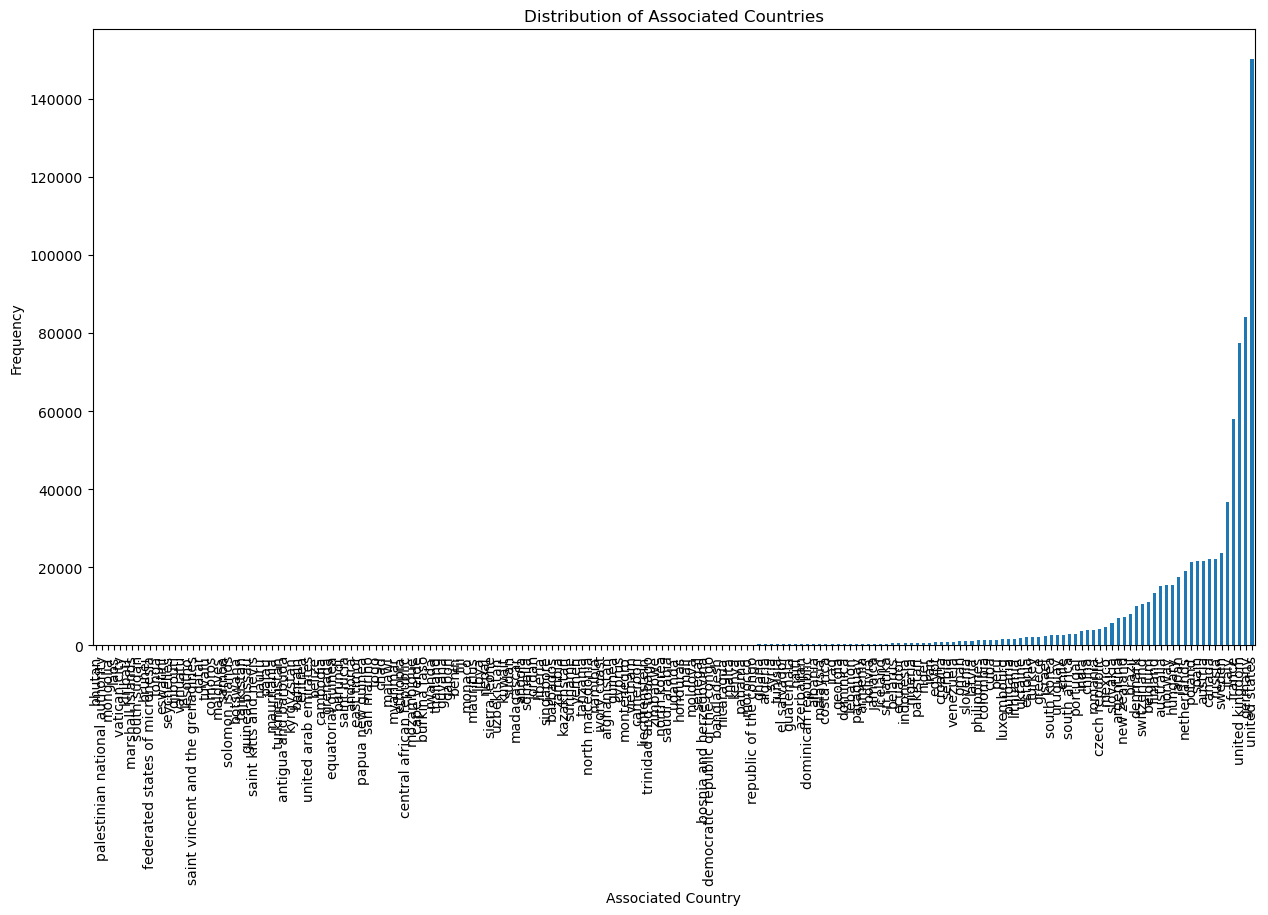

In [ ]:
df_cleaned = df.dropna(subset=['Associated Countries'])

# Split the 'Associated Countries' column into lists
df_cleaned['Associated Countries'] = df_cleaned['Associated Countries'].apply(lambda x: x.split('; '))

# Explode the DataFrame based on the split 'Associated Countries' lists
exploded_df = df_cleaned.explode('Associated Countries')

# Calculate the frequency of each associated country
country_counts = exploded_df['Associated Countries'].value_counts()

# Plotting
plt.figure(figsize=(15, 8))
country_counts.sort_values().plot(kind='bar')
plt.title("Distribution of Associated Countries")
plt.xlabel("Associated Country")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# Create a DataFrame where each row is a unique ID and columns are 'Gender' and 'Occupation'
one_hot = pd.get_dummies(exploded_df[['Gender', 'Occupation']])

# Run Apriori algorithm
frequent_itemsets = apriori(one_hot, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules)


TypeError: unhashable type: 'list'